In [1]:
from openai import OpenAI
import pandas as pd
import umap
import stackview
import numpy as np
import yaml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import seaborn as sns


In [2]:
def draw_embedding(documents, height=3):
    model = SentenceTransformer('intfloat/multilingual-e5-large-instruct')
    
    embeddings = model.encode(documents, convert_to_tensor=True, normalize_embeddings=True)
    
    # Apply PCA
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    transformed_data = pca.fit_transform(embeddings.tolist())
    
    # Convert to DataFrame
    df = pd.DataFrame(transformed_data, columns=['PCA 1', 'PCA 2'])
    df['Document'] = documents
    
    # Create scatter plot
    plt.figure(figsize=(3, 3))
    plot = sns.relplot(data=df, x='PCA 1', y='PCA 2', hue='Document', legend=False, height=height)
    
    # Annotate data points with names
    for i in range(len(df)):
        plot.ax.text(df.iloc[i]['PCA 1'], df.iloc[i]['PCA 2'], df.iloc[i]['Document'])
    
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

In [3]:
faculties = """Lebenswissenschaften
Medizin
Veterinärmedizin
Erziehungswissenschaften
Chemie
Geschichte, Kunst- und Regionalwissenschaften
Mathematik und Informatik
Physik und Erdsystemwissenschaften
Sozialwissenschaften und Philosophie
Jura
Philologie
Sportwissenschaften
Theologie
Wirtschaftswissenschaften""".split("\n")
faculties

['Lebenswissenschaften',
 'Medizin',
 'Veterinärmedizin',
 'Erziehungswissenschaften',
 'Chemie',
 'Geschichte, Kunst- und Regionalwissenschaften',
 'Mathematik und Informatik',
 'Physik und Erdsystemwissenschaften',
 'Sozialwissenschaften und Philosophie',
 'Jura',
 'Philologie',
 'Sportwissenschaften',
 'Theologie',
 'Wirtschaftswissenschaften']

<Figure size 300x300 with 0 Axes>

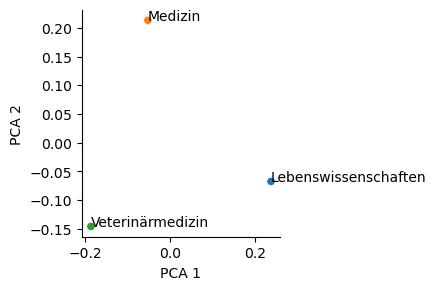

In [4]:
draw_embedding(faculties[:3])

<Figure size 300x300 with 0 Axes>

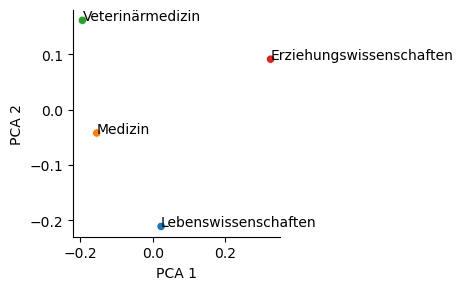

In [5]:
draw_embedding(faculties[:4])

<Figure size 300x300 with 0 Axes>

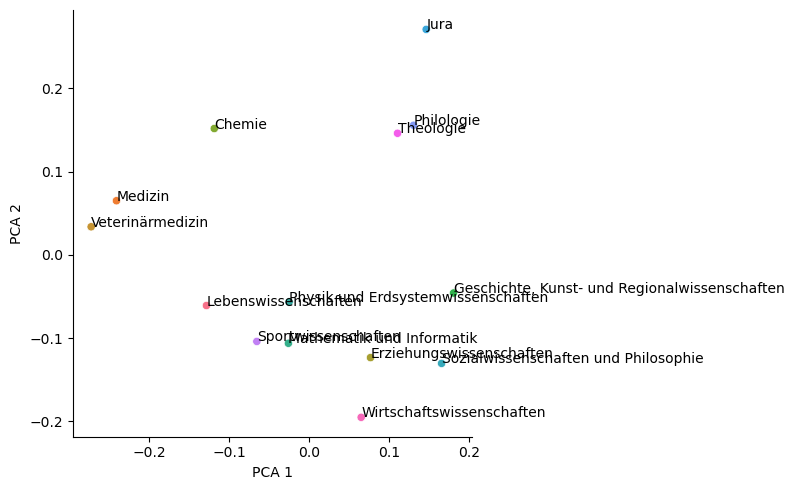

In [6]:
draw_embedding(faculties, height=5)

<Figure size 300x300 with 0 Axes>

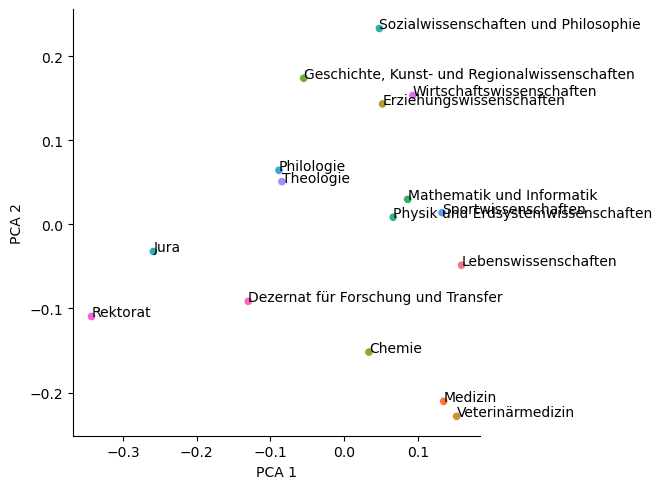

In [7]:
org_units = ["Rektorat", "Dezernat für Forschung und Transfer"]

draw_embedding(faculties + org_units, height=5)

<Figure size 300x300 with 0 Axes>

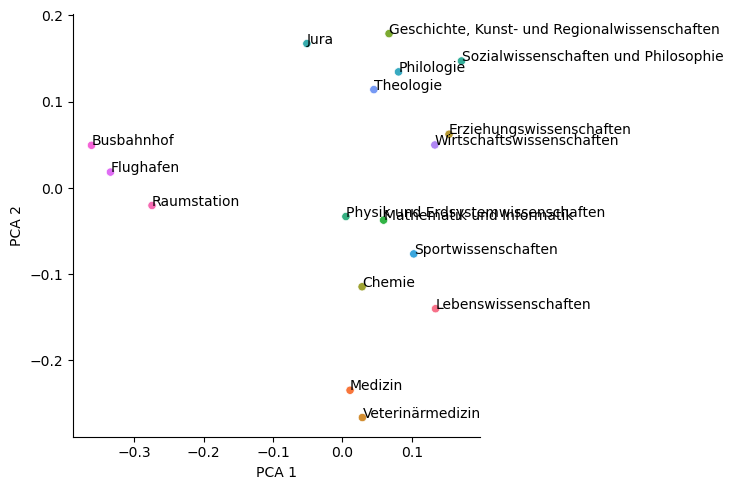

In [8]:
transportation = ["Flughafen", "Busbahnhof", "Raumstation"]

draw_embedding(faculties + transportation, height=5)